# Proyecto Salud Mental y Tasas de Suicidios 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Modelo

In [3]:
df_suicide = pd.read_csv("./world-suicide/master.csv")
df_suicide = df_suicide.drop(['country-year', 'HDI for year'], axis=1)
df_suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [53]:
df_suicide.rename(columns={
    'suicides/100k pop': 'Suicides',
    'country': 'Country',
    'year': 'Year',
    ' gdp_for_year ($) ': 'GDP_Year',
    'gdp_per_capita ($)': 'GDP_Capita'}, 
    inplace=True)
df_suicide

,Country,Year,sex,age,suicides_no,population,Suicides,GDP_Year,GDP_Capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [43]:
country_rate = df_suicide.groupby('Country').Suicides.mean().reset_index()

In [64]:
country_gdp_cap = df_suicide.groupby('Country').GDP_Capita.mean().reset_index()

In [65]:
new_suicide = pd.merge(country_rate, country_gdp_cap, on='Country')
new_suicide

,Country,Suicides,GDP_Capita
0,Albania,3.502879,1859.045455
1,Antigua and Barbuda,0.552901,10448.185185
2,Argentina,10.469328,7914.096774
3,Armenia,3.275872,1873.919463
4,Aruba,9.503095,24221.642857
...,...,...,...
96,United Arab Emirates,1.317917,42162.000000
97,United Kingdom,7.502473,31908.354839
98,United States,13.819812,39269.612903
99,Uruguay,19.461190,7622.071429


In [4]:
df_happiness = pd.read_csv('./world-happiness/master.csv')
df_happiness

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,1
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,2
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,3
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,4
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,5
...,...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380,151
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334,152
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231,153
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203,154


In [8]:
df_happiness.rename(columns={
    "Happiness Rank": "Rank",
    "Happiness Score": "Score",
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health",
    "Trust (Government Corruption)": "Trust"
},inplace=True)
del df_happiness["Rank"]
df_happiness

,Year,Country,Region,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203


In [66]:
df_final = pd.merge(new_suicide, df_happiness, on='Country')
df_final

,Country,Suicides,GDP_Capita,Year,Region,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,Albania,3.502879,1859.045455,2015,Central and Eastern Europe,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,4.959
1,Albania,3.502879,1859.045455,2016,Central and Eastern Europe,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,4.655
2,Albania,3.502879,1859.045455,2017,Central and Eastern Europe,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,4.644
3,Albania,3.502879,1859.045455,2018,Central and Eastern Europe,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,4.586
4,Albania,3.502879,1859.045455,2019,Central and Eastern Europe,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,4.719
...,...,...,...,...,...,...,...,...,...,...,...,...
385,Uzbekistan,8.099129,976.181818,2015,Central and Eastern Europe,0.632440,1.340430,0.597720,0.658210,0.125817,0.228370,6.003
386,Uzbekistan,8.099129,976.181818,2016,Central and Eastern Europe,0.735910,1.168100,0.501630,0.608480,0.283330,0.343260,5.987
387,Uzbekistan,8.099129,976.181818,2017,Central and Eastern Europe,0.786441,1.548969,0.498273,0.658249,0.246528,0.415984,5.971
388,Uzbekistan,8.099129,976.181818,2018,Central and Eastern Europe,0.719000,1.584000,0.605000,0.724000,0.259000,0.328000,6.096


In [10]:
df_happiness.columns[df_happiness.isnull().any()]

Index(['Trust'], dtype='object')

In [11]:
df_happiness.isnull().sum()

Year          0
Country       0
Region        0
Economy       0
Family        0
Health        0
Freedom       0
Trust         1
Generosity    0
Score         0
dtype: int64

In [12]:
df_happiness[df_happiness["Trust"].isnull()]

,Year,Country,Region,Economy,Family,Health,Freedom,Trust,Generosity,Score
484,2018,United Arab Emirates,Middle East and Northern Africa,2.096,0.776,0.67,0.284,NaN,0.186,6.774


In [14]:
avg_data_trust = df_happiness[df_happiness["Score"] > 6.774].mean().Trust
df_happiness.loc[df_happiness["Trust"].isnull(),["Trust"]] = avg_data_trust
df_happiness[df_happiness["Trust"].isnull()]

,Year,Country,Region,Economy,Family,Health,Freedom,Trust,Generosity,Score


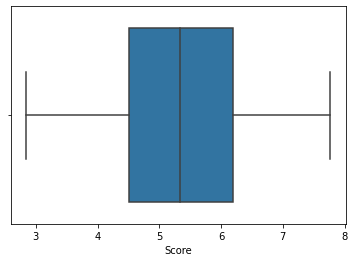

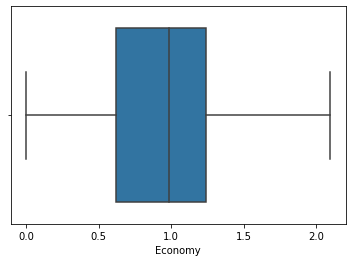

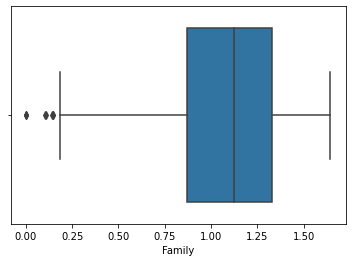

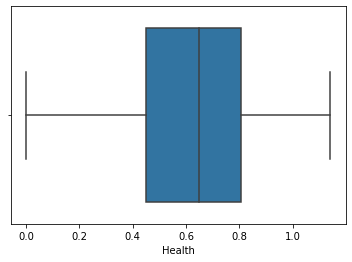

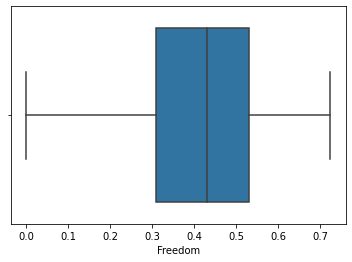

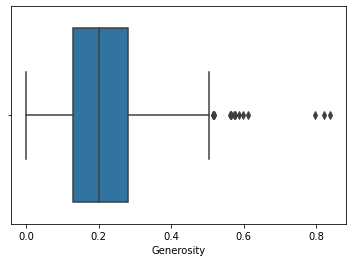

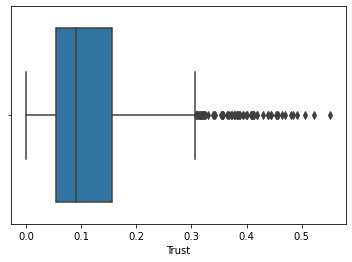

In [16]:
df_H = df_happiness.copy()
column_list = ["Score","Economy","Family","Health","Freedom","Generosity","Trust"]
for col in column_list:
    sns.boxplot(x = df_H[col])
    plt.xlabel(col)
    plt.show()

In [17]:
df_table = df_H["Trust"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Cota inferior: " + str(lower_bound))
print("Cota superior: " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

Cota inferior: -0.09803002864122447
Cota superior: 0.30738338106870744
Q1:  0.054000000000000006
Q3:  0.155353352427483


In [18]:
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector

0       True
1      False
2       True
3       True
4       True
       ...  
760    False
761     True
762    False
763    False
764    False
Name: Trust, Length: 765, dtype: bool

In [19]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  16,  19,  20,  21,
        23,  27,  34,  43,  69,  71,  90, 129, 153, 158, 159, 161, 162,
       163, 165, 166, 167, 177, 179, 185, 193, 232, 233, 254, 283, 309,
       315, 316, 318, 319, 322, 323, 332, 335, 340, 348, 461, 465, 466,
       467, 469, 472, 473, 481, 498, 611, 616, 617, 618, 621, 622, 623,
       624, 629, 631, 649, 761], dtype=int64)

In [20]:
df_table = df_happiness.copy()
df_table["Trust"].iloc[outliers_vector.index.values] = df_table["Trust"].mean()
df_table["Trust"].iloc[outliers_vector.index.values]

c:\users\diana\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0      0.125817
2      0.125817
3      0.125817
4      0.125817
5      0.125817
         ...   
624    0.125817
629    0.125817
631    0.125817
649    0.125817
761    0.125817
Name: Trust, Length: 70, dtype: float64

In [21]:
df_happiness = df_table

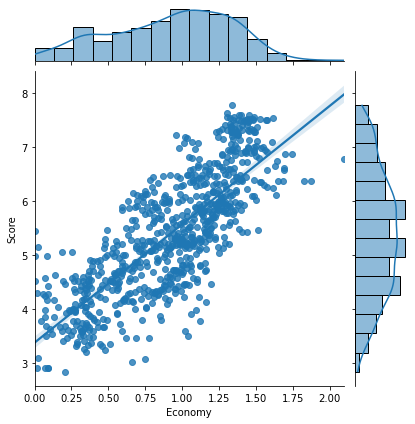

In [22]:
sns.jointplot(x="Economy", y="Score", data=df_table, kind="reg")
plt.show()

In [23]:
X = df_happiness[["Economy"]]
y = df_happiness[["Score"]]

In [24]:
reg = LinearRegression()
model = reg.fit(X,y)
print("Intercept: ", model.intercept_[0])
print("Coef: ", model.coef_[0][0])
print("Rscore: ", model.score(X, y))

Intercept:  3.3736544645137267
Coef:  2.1936448262209676
Rscore:  0.6195104598446823


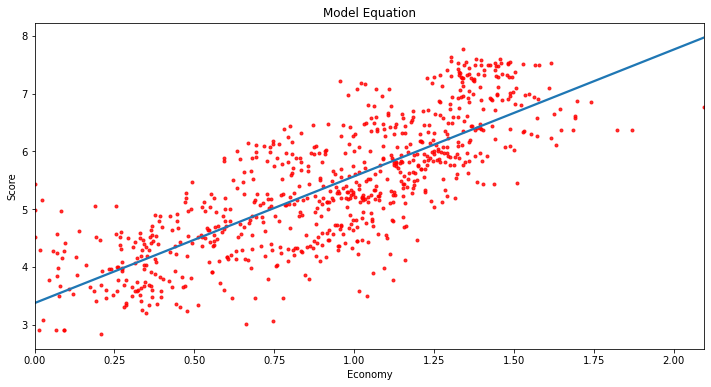

In [25]:
plt.figure(figsize=(12, 6))
g = sns.regplot(x=df_happiness["Economy"], y=df_happiness["Score"], ci=None, scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("Score")
g.set_xlabel("Economy")
plt.show()

In [27]:
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("El Happiness value de un pais con Economy GDP ", g[0], ": ", model.predict([g])[0][0])

El Happiness value de un pais con Economy GDP  0.25 :  3.9220656710689688
El Happiness value de un pais con Economy GDP  0.5 :  4.47047687762421
El Happiness value de un pais con Economy GDP  0.75 :  5.018888084179452
El Happiness value de un pais con Economy GDP  1.0 :  5.567299290734694
El Happiness value de un pais con Economy GDP  1.25 :  6.115710497289936
El Happiness value de un pais con Economy GDP  1.5 :  6.664121703845177


In [34]:
def linear_reg(col, text, prdctn):
    
    sns.jointplot(x=col,y="Score", data=df_table, kind="reg")
    plt.show()
    
    X = df_happiness[[col]]
    y = df_happiness[["Score"]]
    reg = LinearRegression()
    model = reg.fit(X, y)
    
    # prediction
    plt.figure(figsize=(12, 6))
    g = sns.regplot(x=df_happiness[col], y=df_happiness["Score"], ci=None, scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("Score")
    g.set_xlabel(col)
    plt.show()
    
    print(text,": ", model.predict([[prdctn]])[0][0])

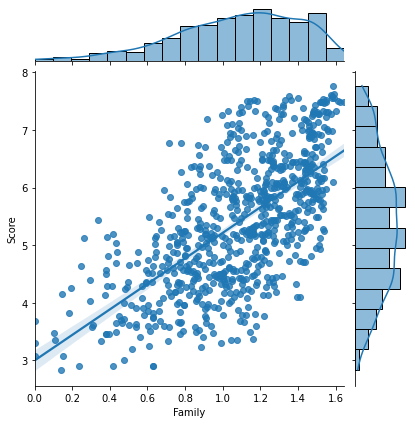

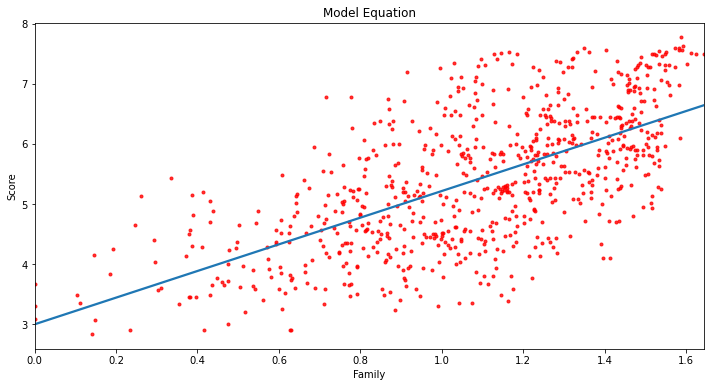

El Happiness value de un pais con Family 2 :  7.432999051970317


In [35]:
linear_reg("Family", "El Happiness value de un pais con Family 2", 2)

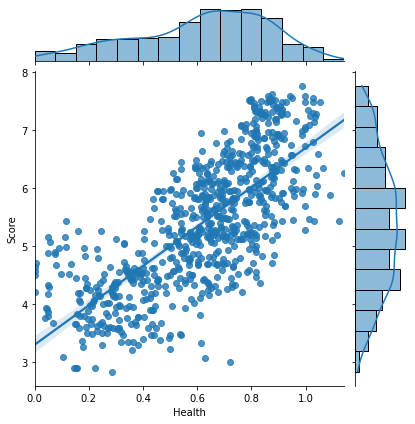

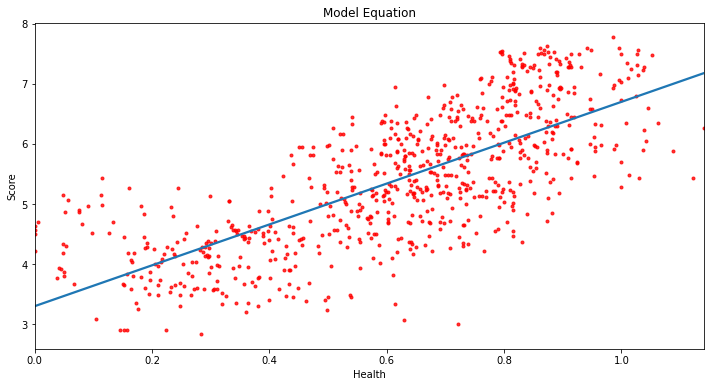

El Happiness value de un pais con Health 1.20 :  7.3781776147597045


In [36]:
linear_reg("Health","El Happiness value de un pais con Health 1.20", 1.20)

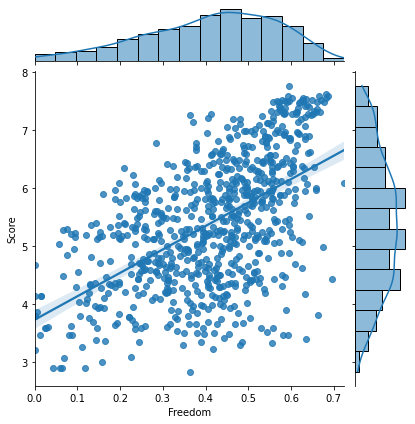

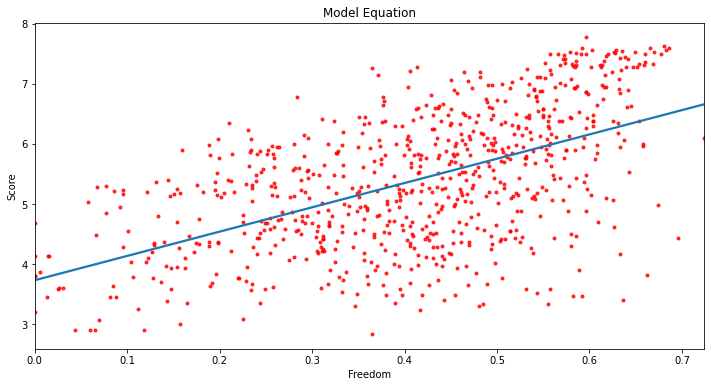

El Happiness value de un pais con Freedom 0.89 :  7.328904159992852


In [38]:
linear_reg("Freedom", "El Happiness value de un pais con Freedom 0.89", 0.89)

In [40]:
df = df_happiness.copy()
df = df.select_dtypes(include=["float64","int64"])

X = df.drop("Score", axis=1)
y = df["Score"]

lm = sms.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.079e+04
Date:                Thu, 20 May 2021   Prob (F-statistic):                        0.00
Time:                        11:46:16   Log-Likelihood:                         -626.98
No. Observations:                 765   AIC:                                      1268.
Df Residuals:                     758   BIC:                                      1300.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0010   4.09e-05     25.501      0.000       0.001       0.001
Economy        1.1814      0.083     14.220      0.000       1.018       1.345
Family         0.6293      0.081      7.731      0.000       0.470       0.789
Health         1.0259      0.135      7.625      0.000       0.762       1.290
Freedom        1.5293      0.160      9.576      0.000       1.216       1.843
Trust          1.1598      0.334      3.474      0.001       0.504       1.815
Generosity     0.6555      0.175      3.749      0.000       0.312       0.999
==============================================================================
Omnibus:                       10.809   Durbin-Watson:                   1.445
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.597
Skew:                          -0.232   Prob(JB):                      0.00303
Kurtosis:                       3.384   Cond. No.                     3.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""